In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-ml-salaries/salaries.csv


# Import Libraries

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

# Load Data


In [53]:
df = pd.read_csv("../input/ai-ml-salaries/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


In [54]:
df.shape

(1332, 11)

In [55]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


# Extract Specific Info

In [57]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M


In [58]:
df.salary_currency.value_counts()

USD    1019
EUR     134
GBP      81
INR      40
CAD      21
AUD       8
BRL       5
PLN       3
TRY       3
JPY       3
SGD       3
DKK       3
CNY       2
HUF       2
MXN       2
CHF       1
CZK       1
CLP       1
Name: salary_currency, dtype: int64

We can see that salary column don't have the same currency. We need salary in USD for easy to play with.

In [59]:
df.work_year.value_counts()

2022    1029
2021     228
2020      75
Name: work_year, dtype: int64

2022 is the majoraty of data collected. We only focus on this year.

In [60]:
# Extract only compapies in US, year is 2022 and salary IN USD
df_us = df.query('company_location == "US" & work_year == 2022 & salary_currency == "USD"').copy()
df_us.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


In [61]:
df_us = df_us.drop(['work_year', 'salary', 'company_location', 'salary_currency'], axis=1)
df_us.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,MI,FT,Machine Learning Engineer,130000,US,0,M
1,MI,FT,Machine Learning Engineer,90000,US,0,M
2,MI,FT,Data Scientist,120000,US,100,M
3,MI,FT,Data Scientist,100000,US,100,M
4,MI,FT,Data Scientist,85000,US,100,M


## Rename columns in 1 format

In [62]:
df_us = df_us.rename(columns={'experience_level':'Level', 'employment_type':'Type',
                     'job_title':'Job_Title', 'salary_in_usd':'Salary',
                     'employee_residence':'Residence', 'remote_ratio':'Remote_Ratio',
                     'company_size':'Company_Size'})

In [63]:
df_us = df_us.reset_index(drop=True)
df_us

,Level,Type,Job_Title,Salary,Residence,Remote_Ratio,Company_Size
0,MI,FT,Machine Learning Engineer,130000,US,0,M
1,MI,FT,Machine Learning Engineer,90000,US,0,M
2,MI,FT,Data Scientist,120000,US,100,M
3,MI,FT,Data Scientist,100000,US,100,M
4,MI,FT,Data Scientist,85000,US,100,M
...,...,...,...,...,...,...,...
802,MI,FL,Data Scientist,100000,CA,100,M
803,SE,FT,Research Scientist,144000,US,50,L
804,EN,FT,Financial Data Analyst,100000,US,50,L
805,EN,FT,Data Engineer,120000,US,100,M


In [64]:
df_us.Residence.value_counts()

US    794
IN      2
BO      2
CN      1
CR      1
CL      1
ES      1
AR      1
MY      1
BR      1
RU      1
CA      1
Name: Residence, dtype: int64

Because most of the employees is in US, we only keep them.

In [65]:
df_us = df_us.query('Residence == "US"').drop(['Residence'], axis=1)
df_us

,Level,Type,Job_Title,Salary,Remote_Ratio,Company_Size
0,MI,FT,Machine Learning Engineer,130000,0,M
1,MI,FT,Machine Learning Engineer,90000,0,M
2,MI,FT,Data Scientist,120000,100,M
3,MI,FT,Data Scientist,100000,100,M
4,MI,FT,Data Scientist,85000,100,M
...,...,...,...,...,...,...
800,SE,FT,Applied Data Scientist,177000,100,L
803,SE,FT,Research Scientist,144000,50,L
804,EN,FT,Financial Data Analyst,100000,50,L
805,EN,FT,Data Engineer,120000,100,M


## Filter Job Title

In [66]:
df_us['Job_Title'].value_counts()

Data Scientist                              225
Data Engineer                               215
Data Analyst                                129
Machine Learning Engineer                    44
Analytics Engineer                           35
Data Architect                               32
Data Science Manager                         21
ML Engineer                                  10
Machine Learning Scientist                    9
Data Operations Engineer                      8
ETL Developer                                 8
Applied Scientist                             4
Data Specialist                               4
AI Scientist                                  4
Data Analytics Manager                        4
Data Manager                                  4
Data Operations Analyst                       4
Applied Data Scientist                        3
Research Scientist                            3
Machine Learning Manager                      2
Data Science Consultant                 

In [67]:
# Only keep top 5 most recruitments
df_us = df_us[df_us['Job_Title'].map(df_us['Job_Title'].value_counts()) >= 5]
df_us

,Level,Type,Job_Title,Salary,Remote_Ratio,Company_Size
0,MI,FT,Machine Learning Engineer,130000,0,M
1,MI,FT,Machine Learning Engineer,90000,0,M
2,MI,FT,Data Scientist,120000,100,M
3,MI,FT,Data Scientist,100000,100,M
4,MI,FT,Data Scientist,85000,100,M
...,...,...,...,...,...,...
792,SE,FT,Data Scientist,165000,100,M
793,MI,FT,Machine Learning Scientist,153000,50,M
795,SE,FT,Data Science Manager,152500,100,M
797,MI,FT,Data Scientist,135000,100,L


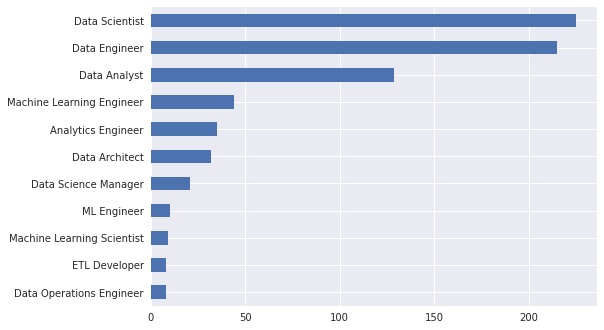

In [68]:
df_us.Job_Title.value_counts().sort_values().plot(kind='barh');

# Save File

In [69]:
df_us.to_csv("Data_AI_Salary_US.csv")